In [1]:
import numpy as np
import pandas as pd

In [2]:
import bokeh as bk
from bokeh.io import output_notebook,show,gridplot
output_notebook()

BokehJS successfully loaded.

In [3]:
print np.__version__
print pd.__version__
print bk.__version__

1.10.2
0.17.1
0.11.0


In [4]:
signal = np.random.normal(0.5,0.1,900) 
instr = np.random.poisson(0.5,100)
sample = np.concatenate((signal,instr),axis=0)
np.random.shuffle(sample)
df = pd.DataFrame({'sample':sample})
df.describe()

,sample
count,1000.000000
mean,0.494025
std,0.201032
min,0.000000
25%,0.416557
50%,0.499375
75%,0.575006
max,2.000000


In [5]:
from bokeh.charts import Histogram
p = Histogram(df,'sample')
show(p)

In [6]:
nbins = 10
bins = np.linspace(0,1,nbins)
df['bins'] = pd.cut(df['sample'],bins)
df['quantil'] = pd.qcut(df['sample'],nbins)
print df.describe(include='all')

hnan = df.isnull().any().values
nnan = df.isnull().sum().values
_f = '{:<10}\t{}\t{:>10}'
print _f.format('\n','Has NaN?','How many?')
for i,col in enumerate(df.columns):
    print _f.format(col,hnan[i],nnan[i])

             sample            bins     quantil
count   1000.000000             939        1000
unique          NaN               8          10
top             NaN  (0.444, 0.556]  (0.651, 2]
freq            NaN             361         100
mean       0.494025             NaN         NaN
std        0.201032             NaN         NaN
min        0.000000             NaN         NaN
25%        0.416557             NaN         NaN
50%        0.499375             NaN         NaN
75%        0.575006             NaN         NaN
max        2.000000             NaN         NaN

         	Has NaN?	 How many?
sample    	False	         0
bins      	True	        61
quantil   	False	         0


In [7]:
print df.groupby('bins').describe()

                          sample
bins                            
(0, 0.111]     count    0.000000
               mean          NaN
               std           NaN
               min           NaN
               25%           NaN
               50%           NaN
               75%           NaN
               max           NaN
(0.111, 0.222] count    7.000000
               mean     0.187071
               std      0.024910
               min      0.166227
               25%      0.168792
               50%      0.170190
               75%      0.207169
               max      0.221156
(0.222, 0.333] count   40.000000
               mean     0.299794
               std      0.025411
               min      0.232567
               25%      0.281863
               50%      0.301696
               75%      0.320779
               max      0.332835
(0.333, 0.444] count  225.000000
               mean     0.399858
               std      0.029409
               min      0.337463
          

In [8]:
from bokeh.charts import BoxPlot
p = BoxPlot(df,values='sample',label='quantil')
show(p)

In [9]:
from bokeh.charts import BoxPlot
p = BoxPlot(df,values='sample',label='bins')
show(p)

ValueError: items in new_categories are not the same as in old categories

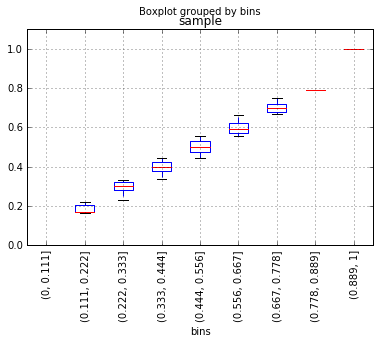

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
df.boxplot(column='sample',by='bins')
plt.ylim([0,1.1])
plt.xticks(rotation=90)
plt.show()